In [1]:
import sys
import os
from pathlib import Path

%matplotlib inline

root_dir = Path(os.getcwd())

if str(root_dir.parents[1]) not in sys.path:
  sys.path.append(str(root_dir.parents[1]))

#print(sys.path)
#print(root_dir)

from LMORL.BAN.API.agents.DQNHybrid import DQNHybrid
from LMORL.BAN.API.ban_utils import Ban

import mo_gymnasium as mo_gym

env = mo_gym.make("mo-lunar-lander-v2")


In [2]:

input_size = env.observation_space.shape[0]
num_actions = int(env.action_space.n)
action_space = list(range(env.action_space.n))
learning_rate = 0.001
epsilon_decay = 0.995
epsilon_min = 0.1
batch_size = 64
train_start = 64
hidden_size = 128
BAN_SIZE = 3
max_memory_size=10000

agent = DQNHybrid(input_size=input_size, num_actions=num_actions,
                  action_space=action_space, learning_rate=learning_rate,
                  epsilon_decay=epsilon_decay, epsilon_min=epsilon_min,
                  batch_size=batch_size, hidden_size=hidden_size,
                  ban_size=BAN_SIZE, max_memory_size=max_memory_size, train_start=100)


In [3]:
episodes = 10
mname = "fooo.model"

rewards, avg_rewards, timings, infos_lists = agent.learning(env=env,episodes = episodes, mname=mname, replay_frequency=4)


11:57:16	Episode	1	timesteps:	68	Took	2.085175 sec - reward:	[-100.0, -142.3643288835883, -18.0]	| 100AvgReward: [-100.0, -142.3643288835883, -18.0]
11:57:44	Episode	2	timesteps:	129	Took	28.495295 sec - reward:	[-100.0, 76.43618993833661, -29.0]	| 100AvgReward: [-100.0, -32.96406947262585, -23.5]
11:57:46	Episode	3	timesteps:	155	Took	1.736567 sec - reward:	[-100.0, 153.09696806332795, -45.0]	| 100AvgReward: [-100.0, 29.056276372692082, -30.666666666666668]
11:57:47	Episode	4	timesteps:	68	Took	0.822515 sec - reward:	[-100.0, 132.38791271671653, -20.0]	| 100AvgReward: [-100.0, 54.88918545869819, -28.0]
11:57:48	Episode	5	timesteps:	107	Took	1.133289 sec - reward:	[-100.0, 94.38888673484325, -35.0]	| 100AvgReward: [-100.0, 62.789125713927206, -29.4]
11:57:49	Episode	6	timesteps:	94	Took	0.997377 sec - reward:	[-100.0, -164.39006260037422, -19.0]	| 100AvgReward: [-100.0, 24.925927661543636, -27.666666666666668]
11:57:50	Episode	7	timesteps:	92	Took	1.045841 sec - reward:	[-100.0, -55.69

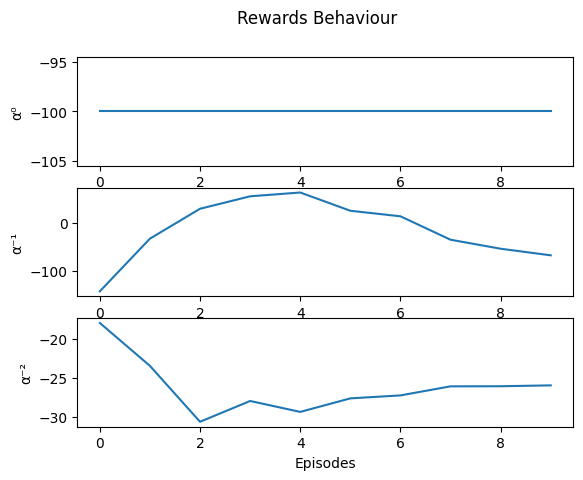

In [4]:
Ban.display_plot(avg_rewards, len(rewards), "Rewards Behaviour")

In [5]:
models_dir = root_dir.parent.absolute() / "models"

In [7]:
agent.dump_model_to_file(model_filename="agent_dump_test.bson", models_path=str(models_dir))

In [ ]:
model_path = models_dir / "agent_dump_test.bson"

In [ ]:
agent.load_model_from_file(model_filepath=str(model_path))